[View in Colaboratory](https://colab.research.google.com/github/alexyarats/ml/blob/master/pytorch_mnist_gpu.ipynb)

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl

In [0]:
!pip3 install torchvision

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as T
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.data import Dataset
from sklearn.metrics import accuracy_score
%matplotlib inline

In [0]:
def get_mnist(train=True, shuffle=True):
  transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.1307,), (0.3081,))
  ])
  
  dataset = torchvision.datasets.MNIST('/tmp', train=train, download=True, transform=transform)
  loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=shuffle)
  
  return loader

In [0]:
train_loader = get_mnist()
test_loader = get_mnist(train=False)

In [0]:
def train(model, optimizer, epoch, train_loader, device, train_losses, train_accuracy):
  train_loss = 0
  correct = 0
  for i, (x, y) in enumerate(train_loader):
    x, y = x.to(device), y.to(device)
    
    optimizer.zero_grad()
    y_hat = model.forward(x)
    
    loss = criterion(y_hat, y)
    loss.backward()
    train_loss += loss.item()
    
    optimizer.step()
    
    pred = y_hat.max(1, keepdim=True)[1]
    correct += pred.eq(y.view_as(pred)).sum().item()
  
  train_loss /= len(train_loader.dataset)
  train_losses.append(train_loss)
  
  correct /= len(test_loader.dataset)
  train_accuracy.append(correct)
  
  if epoch % 10 == 0:
    print('average train_loss: %.5f' % train_loss)

In [0]:
def test(mode, epoch, test_loader, device, test_losses, test_accuracy):
  test_loss = 0
  correct = 0
  for x, y in test_loader:
    x, y = x.to(device), y.to(device)
    
    y_hat = model.forward(x)
  
    loss = criterion(y_hat, y)
    test_loss += loss.item()
    
    pred = y_hat.max(1, keepdim=True)[1]
    correct += pred.eq(y.view_as(pred)).sum().item()
    
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  
  correct /= len(test_loader.dataset)
  test_accuracy.append(correct)
  
  if epoch % 10 == 0:
    print('average test_loss: %.5f' % test_loss)
    print('accuracy: %.5f' % correct)

In [0]:
def build_graph(train, test, x_label, y_label):
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(x_label + ' vs. ' + y_label)
  plt.tight_layout()
  plt.plot(train, label="train")
  plt.plot(test, label="test")
  plt.legend()

In [0]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear1 = nn.Linear(784, 100)
    self.linear2 = nn.Linear(100, 10)
    self.tanh = nn.Tanh()

  def forward(self, x):
    x = self.linear1(x.view(x.size(0), -1))
    x = self.tanh(x)
    x = self.linear2(x)
    return F.softmax(x, dim=1)

average train_loss: 0.05320
average test_loss: 0.04934
accuracy: 0.91300
average train_loss: 0.04711
average test_loss: 0.04730
accuracy: 0.95830
average train_loss: 0.04664
average test_loss: 0.04698
accuracy: 0.96660
average train_loss: 0.04640
average test_loss: 0.04684
accuracy: 0.97110
average train_loss: 0.04626
average test_loss: 0.04677
accuracy: 0.97280
average train_loss: 0.04617
average test_loss: 0.04672
accuracy: 0.97310
average train_loss: 0.04611
average test_loss: 0.04669
accuracy: 0.97330
average train_loss: 0.04607
average test_loss: 0.04667
accuracy: 0.97390
average train_loss: 0.04604
average test_loss: 0.04666
accuracy: 0.97400
average train_loss: 0.04601
average test_loss: 0.04664
accuracy: 0.97430


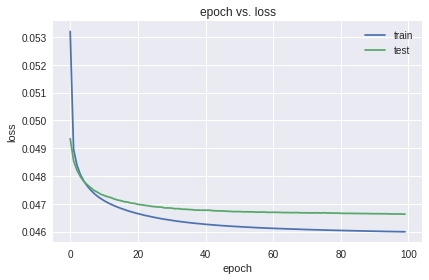

In [82]:
model = MLP().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

train_losses, test_losses = [], []
train_accuracy, test_accuracy = [], []

for epoch in range(100):
  train(model, optimizer, epoch, train_loader, 'cuda', train_losses, train_accuracy)
  test(model, epoch, test_loader, 'cuda', test_losses, test_accuracy)
  
build_graph(train_losses, test_losses, 'epoch', 'loss')
#build_graph(train_accuracy, test_accuracy, 'epoch', 'accuracy')